# Capturando Lat e Long com OpenStreetMap
## Créditos: Denilson e Equipe  

## Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import requests

## Capturando Latitudes e Longitudes das Cidades

In [ ]:
dataset = load_data(DATASET_PATH,DATASET_NAME)

In [11]:
cidades = dataset["city"].values[1:]

In [12]:
latitudes = ['NaN']
longitudes = ['NaN']
for cidade in cidades:
    request = 'https://nominatim.openstreetmap.org/search?city='+cidade+'&state=Piaui&format=json'
    response = requests.get(request)
    response_data = response.json()[0]
    
    latitude = float(response_data["lat"])
    longitude = float(response_data["lon"])
    latitudes.append(latitude)
    longitudes.append(longitude)

## Adicionando Latitudes e Longitudes ao dataset

In [13]:
dataset['latitude'] = latitudes
dataset['longitude'] = longitudes

## Visualização dos Dados

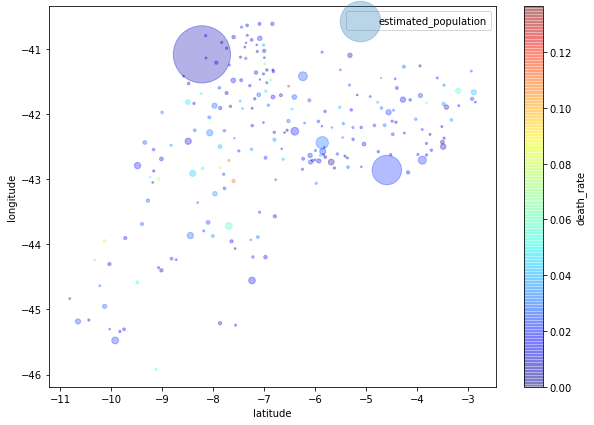

In [14]:
dataset.iloc[1:,].plot(kind='scatter', x='latitude', y='longitude', alpha=0.3,
    s=dataset['estimated_population']/1000, label='estimated_population', figsize=(10,7),
    c='death_rate', cmap=plt.get_cmap('jet'), colorbar=True,
    sharex=False)
plt.legend()
plt.show()